# linear transformation



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_vec(vec, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vec[0], vec[1], head_width=0.3, head_length=0.3, length_includes_head=True, **options)

# matriks standar untuk pencerminan

![matriks standar untuk pencnerminan](./Screen%20Shot%202022-10-11%20at%2012.49.17.png)

In [4]:
# matriks standar pencerminan (refleksi) ke kiri.
Tr=np.array([[-1,0],[0,1]])
Tr

array([[-1,  0],
       [ 0,  1]])

In [5]:
a = np.array([1,2])
a

array([1, 2])

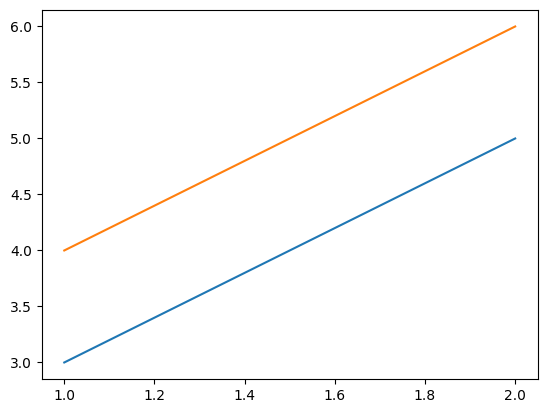

In [35]:
# line1 (1,3) (2,5)
# line2 (1,4) (2,6)
plt.plot([1,2],[[3,4],
                [5,6]])

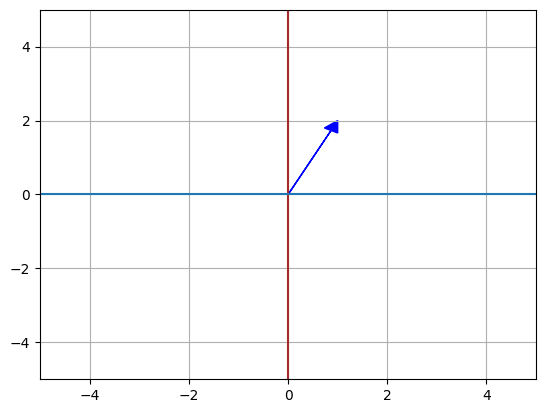

In [30]:
plot_vec(a,color='blue')
# line (0,-5) (0,5)
plt.plot([0,0], [-5,5], color='brown')
# xmin, xmax, ymin, ymax = axis()
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

array([-1,  2])

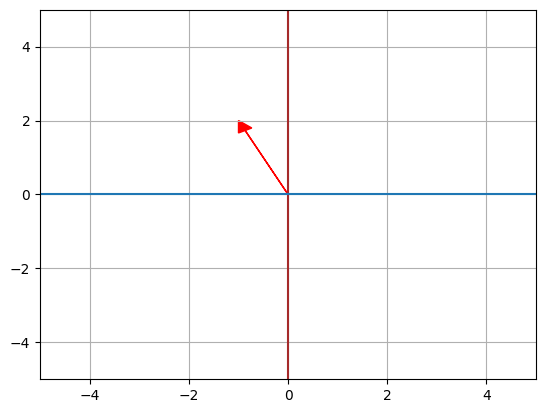

In [7]:
display(a@Tr) # PENTING: BUKAN DOT PRODUCT TAPI MATRIX MULTIPLICATION
plot_vec(a@Tr,color='red')
plt.plot([0,0], [-5,5], color='brown')
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

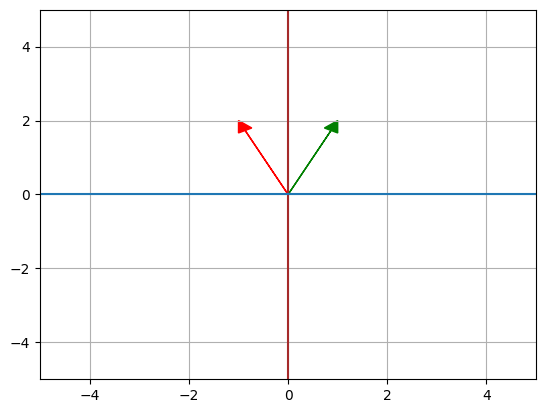

In [8]:
plot_vec(a, color='green')
plot_vec(a@Tr,color='red')
plt.plot([0,0], [-5,5], color='brown')
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

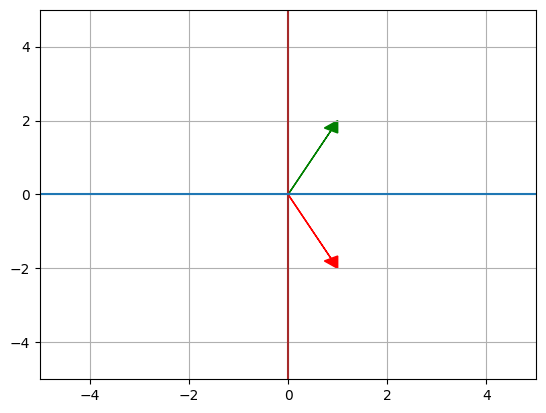

In [9]:
# Tr1 = [[-1,0]  <= mengubah x menjadi -
#        [0,-1]]
# Tr2 = [[1,0]
#        [0,-1]] <= mengubah y menjadi -
Tr2 = np.array([[1,0],[0,-1]])
plot_vec(a, color='green')
plot_vec(a@Tr2,color='red')
plt.plot([0,0], [-5,5], color='brown')
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

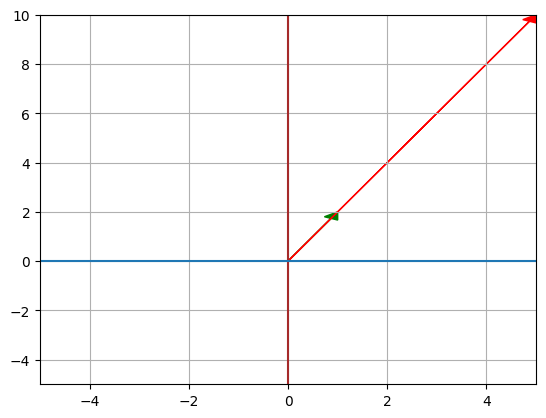

In [10]:
T = np.array([[1,2], [2,4]])
plot_vec(a, color='green')
# hanya perubahan panjang (tidak terjadi perubahan arah) karena
# T(a) = [5,10] = 5[1,2] = 5a
# T = matrix
# a = eigen vector
# A . x = λx
plot_vec(T@a,color='red') 
plt.plot([0,0], [-5,10], color='brown')
plt.axis([-5,5,-5,10])
plt.axhline(0,0)
plt.grid()

# EIGEN VALUE & EIGEN VECTOR

1. Eigen vector == SCALING TANPA PERUBAHAN ARAH / ROTASI (seperti contoh di atas `a = np.array([1,2])`)
2. Nilai Eigen == scaling berapa kali? (seperti contoh di ata, 5a, berarti nilainya 5)

```
eigen vector = x
eigen value = λ
```

Ax = λx

```
A = [ a b ]
    [ c d ]
det(A) = ad - bc
```

![eigen formula](./Screen%20Shot%202022-10-11%20at%2013.36.01.png)

![eigen](./Screen%20Shot%202022-10-11%20at%2019.23.22.png)

![cara cari lambda](./Screen%20Shot%202022-10-11%20at%2018.53.47.png)

In [11]:
A = np.array([[1,2], [2,4]])
A

array([[1, 2],
       [2, 4]])

In [12]:
display(np.linalg.eig(A))
eig_val, vec_eig = np.linalg.eig(A)

(array([0., 5.]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [13]:
eig_val

array([0., 5.])

In [14]:
vec_eig # normalized eigen vector

array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]])

In [15]:
display(np.array([-1,-2])/np.sqrt(5)) # see https://byjus.com/jee/normalized-and-decomposition-of-eigenvectors/#:~:text=Normalized%20eigenvector%20is%20nothing%20but,the%20vector%20of%20length%20one.
display(vec_eig[0]*np.sqrt(eig_val[0]))
display(vec_eig[1]*np.sqrt(eig_val[1]))

array([-0.4472136 , -0.89442719])

array([-0., -0.])

array([ 1., -2.])

RECONSTRUCT MATRIX

![reconstruct matrix](./Screen%20Shot%202022-10-11%20at%2010.50.04.png)

In [16]:
rec = vec_eig @ np.diag(eig_val) @ np.linalg.inv(vec_eig)
rec

array([[1., 2.],
       [2., 4.]])

## Implementasi - Sosmed Network (Twitter) PERHATIAN: ADA YANG SALAH. PERLU DIPERBAIKI

![diretweet siapa?](./Screen%20Shot%202022-10-11%20at%2011.04.44.png)

tabel di atas salah.

B diRT oleh A, D, F

In [17]:
M = np.array([
#     A    B   C   D   E   F
    [0  , 1/4, 0, 1/2, 0,   0],   #A -> B diRT oleh A
    [0  , 0  , 0,   0, 0,   0],   #B
    [1/2, 1/4, 0,   0, 0, 1/2],   #C -> B diRT oleh C
    [1/2, 1/4, 0,   0, 0, 1/2],   #D -> B diRT oleh D
    [0  , 1/4, 0, 1/2, 0,   0],   #E -> B diRT oleh E
    [0  , 0  , 0,   0, 0,   0],   #F
])

In [18]:
eig_val, eig_vect = np.linalg.eig(M)

In [19]:
eig_val

array([ 0. ,  0. ,  0.5, -0.5,  0. ,  0. ])

In [20]:
eig_vect

array([[ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -2.55878898e-276, -2.29441643e-276],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  5.11757796e-276,  0.00000000e+000],
       [ 0.00000000e+000,  1.00000000e+000,  5.00000000e-001,
         5.00000000e-001,  5.27160038e-001,  2.98392024e-001],
       [ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
         5.00000000e-001, -2.55878898e-276,  1.07930590e-291],
       [ 1.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -8.49766023e-001, -9.54443398e-001],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  2.29441643e-276]])

**PERHATIAN: np.argmax return INDEX**

In [21]:
np.argmax(eig_val)

2

```
array([[ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -2.55878898e-276, -2.29441643e-276],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  5.11757796e-276,  0.00000000e+000],
                A        (B yang paling besar)     C
                |                |                 |
                v                v                 v
       [ 0.00000000e+000,  1.00000000e+000,  5.00000000e-001,       => pilih ini berdasarkan np.argmax(e_value)
         5.00000000e-001,  5.27160038e-001,  2.98392024e-001],
       [ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
         5.00000000e-001, -2.55878898e-276,  1.07930590e-291],
       [ 1.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -8.49766023e-001, -9.54443398e-001],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  2.29441643e-276]])
```

In [22]:
np.argmax(eig_vect[2])

1

## Playground PERHATIAN: ADA YANG SALAH. PERLU DIPERBAIKI

### Horizontal

In [97]:
A = np.array([[  0, 1/2,   0, 1/2,   0],  # A diRT oleh    B,    D
              [  1,   0,   0,   0,   0],  # B diRT oleh A
              [1/4, 1/4,   0, 1/4, 1/4],  # C diRT oleh A, B,    D
              [  0,   0,   0,   0,   0],
              [  0,   0,   0,   0,   0]])
eig_val, eig_vect = np.linalg.eig(A)
display(eig_val, eig_vect)
display(np.argmax(eig_val))
display(np.argmax(eig_vect[np.argmax(eig_val)]))

array([ 0.        ,  0.70710678, -0.70710678,  0.        ,  0.        ])

array([[ 0.00000000e+000,  5.17880808e-001,  5.75297568e-001,
         7.80250880e-292,  0.00000000e+000],
       [ 0.00000000e+000,  7.32394062e-001, -8.13593622e-001,
        -1.00411309e-275,  0.00000000e+000],
       [ 1.00000000e+000,  4.42038920e-001,  8.42503782e-002,
         1.00000000e+000, -1.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         1.00411309e-275,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  2.00416836e-291]])

1

1

### Vertikal

In [96]:
A = np.array([[0  , 1, 1/4, 0, 0],
              [1/2, 0, 1/4, 0, 0],
              [0  , 0,   0, 0, 0],
              [1/2, 0, 1/4, 0, 0],
              [0  , 0, 1/4, 0, 0]])
eig_val, eig_vect = np.linalg.eig(A)
display(eig_val, eig_vect)
display(np.argmax(eig_val))
display(np.argmax(eig_vect[np.argmax(eig_val)]))

array([ 0.        ,  0.70710678, -0.70710678,  0.        ,  0.        ])

array([[ 0.00000000e+000,  7.07106781e-001,  7.07106781e-001,
         0.00000000e+000, -1.00208418e-291],
       [ 0.00000000e+000,  5.00000000e-001, -5.00000000e-001,
         0.00000000e+000, -5.01042090e-292],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  2.00416836e-291],
       [ 1.00000000e+000,  5.00000000e-001, -5.00000000e-001,
         0.00000000e+000,  3.88571468e-016],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         1.00000000e+000, -1.00000000e+000]])

1

1